[View in Colaboratory](https://colab.research.google.com/github/JacksonIsaac/kadenze-deeplearning-creative-applications/blob/master/Kadenze_Session_3.ipynb)

In [0]:
%matplotlib inline
#%pylab

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

plt.style.use('ggplot')

In [2]:
!git clone https://github.com/JacksonIsaac/CADL.git
!mv CADL/session-3/* .

fatal: destination path 'CADL' already exists and is not an empty directory.
mv: cannot stat 'CADL/session-3/*': No such file or directory


In [0]:
from libs.utils import montage
from libs import gif
from libs.datasets import MNIST

In [4]:
ds = MNIST()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
ds.X.shape

(70000, 784)

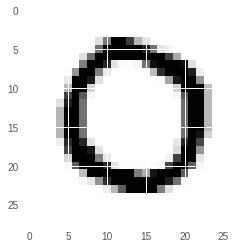

In [6]:
plt.imshow(ds.X[0].reshape((28,28)))

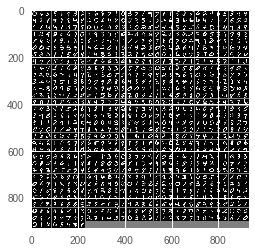

In [7]:
imgs = ds.X[:1000].reshape((-1, 28, 28))
plt.imshow(montage(imgs), cmap='gray')

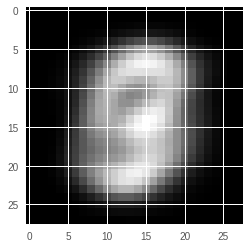

In [8]:
mean_img = np.mean(ds.X, axis=0)
plt.figure()
plt.imshow(mean_img.reshape((28, 28)), cmap='gray')

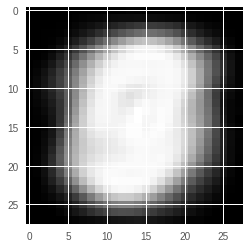

In [9]:
std_img = np.std(ds.X, axis=0)
plt.figure()
plt.imshow(std_img.reshape((28, 28)), cmap='gray')

In [0]:
dimensions = [512, 256, 128, 64]

In [11]:
n_features = ds.X.shape[1]

## [None, n] means that it can have any no of rows m
X = tf.placeholder(tf.float32, [None, n_features])

current_input = X
n_input = n_features


## For Encoder
Ws = []

for layer_i, n_output in enumerate(dimensions):
    with tf.variable_scope('encoder/layer/{}'.format(layer_i)):
        
        W = tf.get_variable(
            name = 'W',
            shape = [n_input, n_output],
            initializer = tf.random_normal_initializer(mean=0.0, stddev=0.02)
        )
        
        h = tf.matmul(current_input, W)
        
        current_input = tf.nn.relu(h)
        
        Ws.append(W)
        
        n_input = n_output
        
Ws = Ws[::-1]

dimensions = dimensions[::-1][1:] + [ds.X.shape[1]]

print(dimensions)

## Decoder

for layer_i, n_output in enumerate(dimensions):
    with tf.variable_scope('decoder/layer/{}'.format(layer_i)):
        
        W = tf.transpose(Ws[layer_i])
        
        h = tf.matmul(current_input, W)
        
        current_input = tf.nn.relu(h)
        
        n_input = n_output

[128, 256, 512, 784]


In [12]:
Y = current_input

cost = tf.reduce_mean(tf.squared_difference(X, Y), 1)

print(cost.get_shape())

(?,)


0 0.045469638
1 0.0368985
2 0.033883274
3 0.032092784
4 0.029683132
5 0.030717824
6 0.030414123
7 0.02940402
8 0.029065864
9 0.028139152
10 0.027839493
11 0.027875245
12 0.02771985
13 0.02745212
14 0.02720318
15 0.027344692
16 0.027864574
17 0.026812125
18 0.026795292
19 0.02610302
20 0.02740057
21 0.027012415
22 0.026669879
23 0.026392644
24 0.026271863
25 0.025984237
26 0.02713754
27 0.026484475
28 0.02611655
29 0.026114898
30 0.025690539
31 0.025444668
32 0.025149098
33 0.025735341
34 0.025848918
35 0.026535043
36 0.025453646
37 0.026388299
38 0.025997054
39 0.025305517
40 0.025663571
41 0.02572911
42 0.026020154
43 0.025139876
44 0.025249112
45 0.025859611
46 0.02593031
47 0.024765013
48 0.025362756
49 0.025636477
50 0.025041224
51 0.026028372
52 0.024597371
53 0.025199292
54 0.024743922
55 0.025165258
56 0.026599336
57 0.024687538
58 0.024764681
59 0.02467741
60 0.024841165
61 0.025679665
62 0.025672155
63 0.025318509
64 0.02489946
65 0.026017895
66 0.024887772
67 0.02507961
68 0.

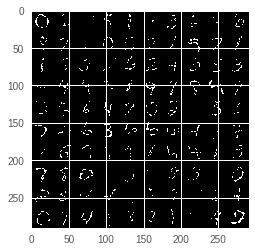

In [13]:
cost = tf.reduce_mean(cost)

learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 100
n_epochs = 10

examples = ds.X[:100]

imgs = []

fig, ax = plt.subplots(1,1)

for epoch_i in range(n_epochs):
    for batch_X, _ in ds.train.next_batch():
        sess.run(optimizer, feed_dict={X: batch_X - mean_img})
    recon = sess.run(Y, feed_dict={X: examples - mean_img})
    recon = np.clip((recon + mean_img).reshape((-1, 28,28)), 0, 255)
    
    img_i = montage(recon).astype(np.uint8)
    imgs.append(img_i)
    
    ax.imshow(img_i, cmap='gray')
    
    fig.canvas.draw()
    
    print(epoch_i, sess.run(cost, feed_dict={X: batch_X - mean_img}))
    
#gif.build_gif(imgs, saveto='ae.gif', cmap='gray')

In [0]:
#import IPython.display as ipyd
#ipyd.Image(url='ae.gif?{}'.format(np.random.rand()),
#           height=500, width=500)

In [0]:
from tensorflow.python.framework.ops import reset_default_graph

In [0]:
reset_default_graph()

In [17]:
X = tf.placeholder(tf.float32, [None, n_features])

## Reshape placeholder to 4d for convolutional input
## Batch dimension will be filled in place of -1 and
## the shape of the image remains constant.
X_tensor = tf.reshape(X, [-1, 28, 28, 1])

n_filters = [16, 16, 16]
filter_size = [4, 4, 4]

current_input = X_tensor

n_input = 1 # Number of channels in an image

# Will use convolution to find 16 filters/channels of information
Ws = []
shapes = []

for layer_i, n_output in enumerate(n_filters):
    with tf.variable_scope('encoder/layer/{}'.format(layer_i)):
        shapes.append(current_input.get_shape().as_list())
        
        W = tf.get_variable(
            name='W',
            shape=[
                filter_size[layer_i], # height
                filter_size[layer_i], # width
                n_input, # No. of input channels
                n_output # No. of output channels
            ],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.02)
        )
        
        # [1, 2, 2, 1]
        # [batch_dimension, next height, next width, #channel]
        # Take every image. Apply to every other height and width. 
        # Apply to every channel.
        
        h = tf.nn.conv2d(current_input, W, strides=[1, 2, 2, 1], padding='SAME')
        
        current_input = tf.nn.relu(h)
        
        Ws.append(W)
        
        n_input = n_output
        
Ws.reverse()
shapes.reverse()
n_filters.reverse()

n_filters = n_filters[1:] + [1]

print(n_filters, filter_size, shapes)

for layer_i, shape in enumerate(shapes):
    with tf.variable_scope('decoder/layer/{}'.format(layer_i)):
        W = Ws[layer_i]
        
        h = tf.nn.conv2d_transpose(
            current_input, W,
            tf.stack([tf.shape(X)[0], shape[1], shape[2], shape[3]]),
            strides=[1, 2, 2, 1], padding='SAME'
        )
        
        current_input = tf.nn.relu(h)

[16, 16, 1] [4, 4, 4] [[None, 7, 7, 16], [None, 14, 14, 16], [None, 28, 28, 1]]


Instructions for updating:
Use `tf.global_variables_initializer` instead.
0 0.026331535
1 0.024900869
2 0.02439902
3 0.025704691
4 0.024725426
5 0.025439287
6 0.02509238
7 0.024960622
8 0.02436649
9 0.023329472
10 0.024501383
11 0.024886288
12 0.023679547
13 0.024384394
14 0.024900615
15 0.024031606
16 0.02463571
17 0.0241411
18 0.024095431
19 0.024459625
20 0.02381361
21 0.023553228
22 0.02514791
23 0.024371695
24 0.024124416
25 0.024170065
26 0.024152182
27 0.024856769
28 0.024202667
29 0.02407361
30 0.024092775
31 0.023440989
32 0.023282848
33 0.024140503
34 0.024367211
35 0.024514217
36 0.024504025
37 0.024034271
38 0.02404277
39 0.023775093
40 0.023893544
41 0.024342038
42 0.02299014
43 0.023722196
44 0.024350006
45 0.023996526
46 0.023717074
47 0.02315684
48 0.024317302
49 0.024555523
50 0.023660364
51 0.023372168
52 0.022710271
53 0.023452224
54 0.023682356
55 0.023515241
56 0.023085337
57 0.024266696
58 0.023405306
59 0.023662267
60 0.023817098
61 0.023228101
62 0.023241872
63 

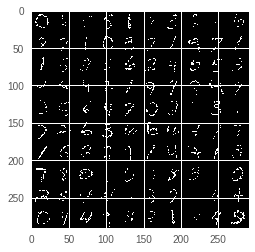

In [18]:
Y = current_input
Y = tf.reshape(Y, [-1, n_features])

cost = tf.reduce_mean(tf.reduce_mean(tf.squared_difference(X, Y), 1))

learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

sess = tf.Session()

sess.run(tf.initialize_all_variables())

batch_size = 100
n_epoch = 10

examples = ds.X[:100]

imgs = []
fig, ax = plt.subplots(1, 1)
for epoch_i in range(n_epochs):
    for batch_X, _ in ds.train.next_batch():
        sess.run(optimizer, feed_dict={X: batch_X - mean_img})
    recon = sess.run(Y, feed_dict={X: examples - mean_img})
    recon = np.clip((recon + mean_img).reshape((-1, 28, 28)), 0, 255)
    img_i = montage(recon).astype(np.uint8)
    imgs.append(img_i)
    ax.imshow(img_i, cmap='gray')
    fig.canvas.draw()
    print(epoch_i, sess.run(cost, feed_dict={X: batch_X - mean_img}))
#gif.build_gif(imgs, saveto='conv-ae.gif', cmap='gray')

In [0]:
from libs import datasets

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
6
7
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


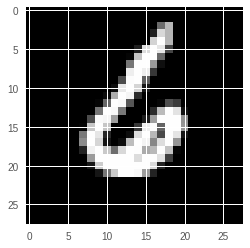

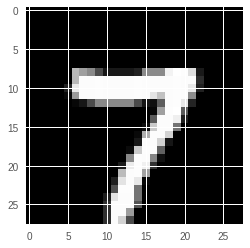

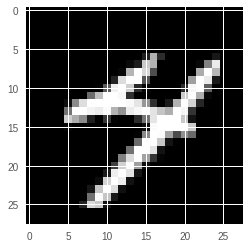

In [20]:
ds = datasets.MNIST(one_hot=False)
print(ds.Y[0])
plt.imshow(np.reshape(ds.X[0], (28, 28)), cmap='gray')

plt.figure()

print(ds.Y[1])
plt.imshow(np.reshape(ds.X[1], (28, 28)), cmap='gray')

ds = datasets.MNIST(one_hot=True)

plt.figure()

print(ds.Y[0])
plt.imshow(np.reshape(ds.X[0], (28, 28)), cmap='gray')

In [0]:
from libs import utils

In [22]:
reset_default_graph()

ds = datasets.MNIST(one_hot=True, split=[0.8, 0.1, 0.1])

n_input = 28 * 28 # Input image dimensions
n_output = 10 # 10 One-hot encoded output labels

X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

## utils.linear returns weight, predictions.
## Hence, For Y_pred we have used utils.linear(...)[0]
Y_pred, W = utils.linear(
    x=X,
    n_output=n_output,
    activation=tf.nn.softmax,
    name='layer1')

## Take log of Y_pred + Epsilon, where epsilon is very small number.
## This makes sure that we are not taking log(0).
cross_entropy = -tf.reduce_sum(Y * tf.log(Y_pred + 1e-12))

learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

predicted_y = tf.argmax(Y_pred, 1)
actual_y = tf.argmax(Y, 1)

correct_prediction = tf.equal(predicted_y, actual_y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [23]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 50
n_epochs = 10

## Training
for epoch_i in range(n_epochs):
    for batch_xs, batch_ys in ds.train.next_batch():
        sess.run(optimizer, feed_dict={
            X: batch_xs, Y: batch_ys
        })
    valid = ds.valid
    print(sess.run(accuracy,
                  feed_dict={
                      X: valid.images,
                      Y: valid.labels
                  }))

## Testing accuracy
test = ds.test
print(sess.run(accuracy,
              feed_dict={
                  X: test.images,
                  Y: test.labels
              }))

0.9004286
0.91514283
0.9192857
0.91985714
0.92157143
0.9212857
0.92228574
0.9232857
0.92385715
0.9225714
0.92914283


In [24]:
g = tf.get_default_graph()
[op.name for op in g.get_operations()]

['Placeholder',
 'Placeholder_1',
 'layer1/W/Initializer/random_uniform/shape',
 'layer1/W/Initializer/random_uniform/min',
 'layer1/W/Initializer/random_uniform/max',
 'layer1/W/Initializer/random_uniform/RandomUniform',
 'layer1/W/Initializer/random_uniform/sub',
 'layer1/W/Initializer/random_uniform/mul',
 'layer1/W/Initializer/random_uniform',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/h',
 'layer1/Softmax',
 'add/y',
 'add',
 'Log',
 'mul',
 'Const',
 'Sum',
 'Neg',
 'gradients/Shape',
 'gradients/grad_ys_0',
 'gradients/Fill',
 'gradients/Neg_grad/Neg',
 'gradients/Sum_grad/Reshape/shape',
 'gradients/Sum_grad/Reshape',
 'gradients/Sum_grad/Shape',
 'gradients/Sum_grad/Tile',
 'gradients/mul_grad/Shape',
 'gradients/mul_grad/Shape_1',
 'gradients/mul_grad/BroadcastGradientArgs',
 'gradients/mul_grad/Mul',
 'gradients/mul_grad/Sum',
 'gradients/mul_grad/Reshape',
 '

In [0]:
W = g.get_tensor_by_name('layer1/W:0')

In [0]:
W_arr = np.array(W.eval(session=sess))

In [27]:
print(W_arr.shape)

(784, 10)


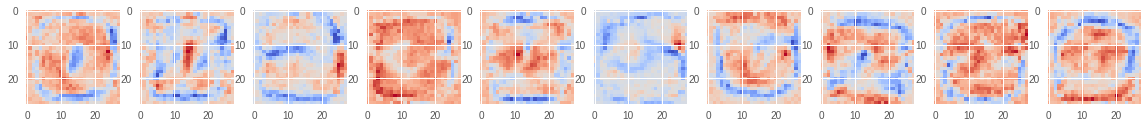

In [28]:
fig, ax = plt.subplots(1, 10, figsize=(20, 3))
for col_i in range(10):
    ax[col_i].imshow(W_arr[:, col_i].reshape((28, 28)), cmap='coolwarm')


In [29]:
reset_default_graph()

g = tf.get_default_graph()
print([op.name for op in g.get_operations()])

[]


In [33]:
mnist = datasets.MNIST(one_hot = True)

n_inputs = 28 * 28
n_outputs = 10

X = tf.placeholder(tf.float32, [None, n_inputs])
Y = tf.placeholder(tf.float32, [None, n_outputs])

## For convlution NN we require 4D 
## N * H * W * Ch
X_4d = tf.reshape(X, [-1, 28, 28, 1])

filter_size = 5

n_filters_in = 1 # One channel as input
n_filters_out = 32 # 32 filters (channels of information as output)

W_1 = tf.get_variable(
    name='W',
    # shape = [Height, width, no of input channels, no of output channels]
    shape=[filter_size, filter_size, n_filters_in, n_filters_out],
    initializer=tf.random_normal_initializer())

## Input image will be down-sized by 2 when we set strides as 2 i.e., 1,2,2,1

## bias is size of no of output channels since we will apply bias after
## the convolution is performed.
b_1 = tf.get_variable(name='b',
                     shape=[n_filters_out],
                     initializer=tf.constant_initializer())

h_1 = tf.nn.relu(
    tf.nn.bias_add(
        tf.nn.conv2d(
            input=X_4d,
            filter=W_1,
            strides=[1, 2, 2, 1],
            padding='SAME'),
    b_1))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
